## Observations and Insights

 1) Based off the Capomulin drug regimen there does seem to be a very strong correlation between tumor size and weight. 

 2) While we did have one outlier in one of the promising treatments, it does seem that the data set is solid and I would feel confident in exploring the data further knowing this.
 
 3) The data set has an almost even representation of Male vs Female. This allows a comprehensive view of the population and confident in the data pulled from it.

 4) Another observation is that some mice did not make it to the standard timepoint(45). I would be interested in exploring this data further if it was available.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen'
summary_table = {
    "Tumor Volume (Mean)":"",
    "Tumor Volume (Median)":"",
    "Tumor Volume (Variance)":"",
    "Tumor Volume (St.Dev.)":"",
    "Tumor Volume (SEM)":""
}
grouped_by_regimen = combined_df.groupby('Drug Regimen')
summary_table["Tumor Volume (Mean)"] = grouped_by_regimen["Tumor Volume (mm3)"].mean()
summary_table["Tumor Volume (Median)"] = grouped_by_regimen["Tumor Volume (mm3)"].median()
summary_table["Tumor Volume (Variance)"] = (grouped_by_regimen["Tumor Volume (mm3)"]).var()
summary_table["Tumor Volume (St.Dev.)"] = (grouped_by_regimen["Tumor Volume (mm3)"]).std()
summary_table["Tumor Volume (SEM)"] = (grouped_by_regimen["Tumor Volume (mm3)"]).sem()

summary_df = pd.DataFrame(summary_table)
summary_df.head(25)

,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Variance),Tumor Volume (St.Dev.),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Regimen Count')

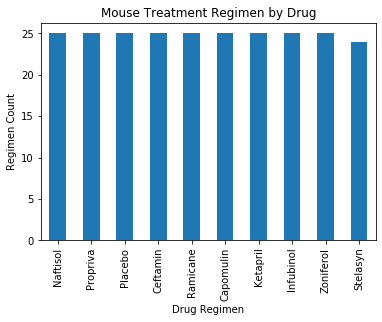

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
unique_df = combined_df.drop_duplicates("Mouse ID", keep='first')
unique_df = pd.DataFrame(unique_df["Drug Regimen"].value_counts())
unique_df.plot(kind = 'bar', legend = None, title = "Mouse Treatment Regimen by Drug")

plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")

Text(0.5, 1, 'Mouse Treatment Regimen by Drug')

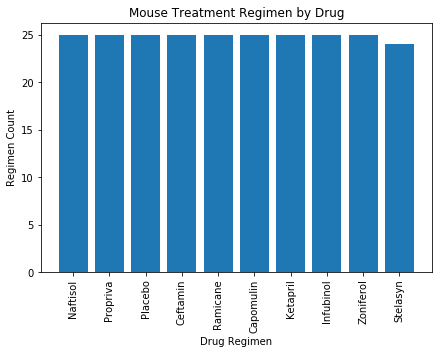

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
sex_bar = pd.DataFrame(mouse_metadata["Drug Regimen"].value_counts())
sex_bar = sex_bar.reset_index()
sex_bar = sex_bar.rename(columns = {"Drug Regimen":"Treatment Count", "index":"Drug Regimen"})
x_axis = sex_bar["Drug Regimen"]
y_axis = sex_bar["Treatment Count"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Regimen Count")
plt.title("Mouse Treatment Regimen by Drug")

## Pie plots

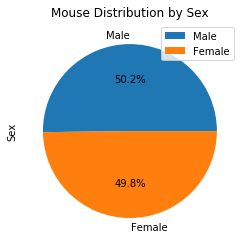

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_pie = mouse_metadata["Sex"].value_counts()
sex_pie = pd.DataFrame(sex_pie)

sex_pie.plot(kind='pie', subplots=True, autopct="%1.1f%%")
plt.title("Mouse Distribution by Sex")
plt.legend()

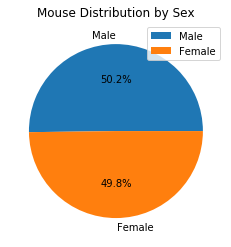

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = (mouse_metadata["Sex"].unique())
sex_counts = (mouse_metadata["Sex"].value_counts())
plt.pie(sex_counts, labels=sex, autopct="%1.1f%%")
plt.title("Mouse Distribution by Sex")
plt.legend(loc="best")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


promising_treatments_df = combined_df.loc[(combined_df["Drug Regimen"] == 'Ramicane') | (combined_df["Drug Regimen"] == 'Capomulin') | (combined_df["Drug Regimen"] == 'Infubinol') | (combined_df["Drug Regimen"] == 'Ceftamin')]
grouped_promising_treatments = promising_treatments_df.groupby("Mouse ID")
final_tumor_size_df = pd.DataFrame(grouped_promising_treatments["Tumor Volume (mm3)"].last())
final_tumor_size_df = final_tumor_size_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume (mm3) - Final"})
final_tumor_size = final_tumor_size_df["Tumor Volume (mm3) - Final"]

tumor_quartiles = final_tumor_size.quantile([.25,.5,.75])
lowerq = tumor_quartiles[0.25]
upperq = tumor_quartiles[0.75]
iqr = upperq-lowerq

final_tumor_size_df["Tumor Volume (mm3) - Final"]
print(final_tumor_size_df.head())
print("")
print(f"The interquartile range for final tumor size is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")
print(f"The following dataframe identifies mice that are potential outliers:")
print(final_tumor_size_df.loc[(final_tumor_size_df["Tumor Volume (mm3) - Final"] > upper_bound) | (final_tumor_size_df["Tumor Volume (mm3) - Final"] < lower_bound)])
print("")
print("There are no outliers.")

Tumor Volume (mm3) - Final
Mouse ID                            
a203                       67.973419
a251                       65.525743
a275                       62.999356
a411                       38.407618
a444                       43.047543

The interquartile range for final tumor size is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.

The following dataframe identifies mice that are potential outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3) - Final]
Index: []

There are no outliers.


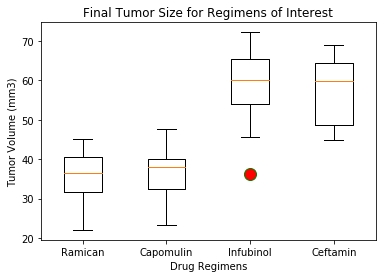

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ramican_df = combined_df.loc[combined_df["Drug Regimen"] == 'Ramicane']
ramican_grouped = ramican_df.groupby("Mouse ID")

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == 'Capomulin']
capomulin_grouped = capomulin_df.groupby("Mouse ID")

infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == 'Infubinol']
infubinol_grouped = infubinol_df.groupby("Mouse ID")

ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == 'Ceftamin']
ceftamin_grouped = ceftamin_df.groupby("Mouse ID")

#colors outliers if there were outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')


ax1.boxplot([ramican_grouped["Tumor Volume (mm3)"].last(), capomulin_grouped["Tumor Volume (mm3)"].last(), infubinol_grouped["Tumor Volume (mm3)"].last(), ceftamin_grouped["Tumor Volume (mm3)"].last()], flierprops=flierprops)

plt.xticks([1,2,3,4],["Ramican","Capomulin","Infubinol","Ceftamin"])
plt.title("Final Tumor Size for Regimens of Interest")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

(23.16739732, 50.47375302)

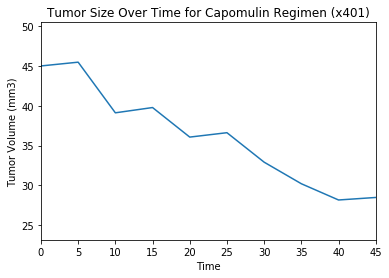

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse = combined_df.loc[combined_df["Mouse ID"] == 'x401']
x_axis = selected_mouse["Timepoint"]
y_axis = selected_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Size Over Time for Capomulin Regimen (x401)")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(x_axis))
plt.ylim(min(y_axis)-5, max(y_axis) + 5)

Text(0.5, 1.0, 'Average Tumor Volume vs Weight (Capomulin)')

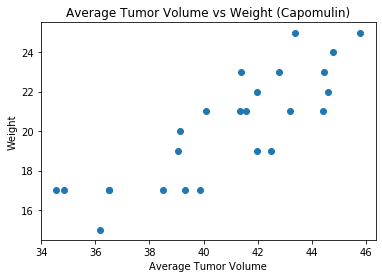

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_volume_capo = capomulin_grouped["Tumor Volume (mm3)"].mean()
weight_capo = capomulin_grouped["Weight (g)"].mean()
plt.scatter(tumor_volume_capo,weight_capo)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight")
plt.title("Average Tumor Volume vs Weight (Capomulin)")



The correlation coefficient between Tumor Volume and Weight for the Capomulin Regimen is 0.84

Linear Regression Model: y = 0.74 x + -10.15


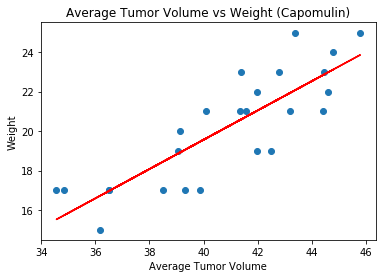

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Tumor Volume and Weight for the Capomulin Regimen is {round(st.pearsonr(tumor_volume_capo,weight_capo)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_volume_capo, weight_capo)
regress_values = tumor_volume_capo * slope + intercept

plt.scatter(tumor_volume_capo,weight_capo)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight")
plt.title("Average Tumor Volume vs Weight (Capomulin)")
plt.plot(tumor_volume_capo,regress_values,"r-")
print("")
print(f'Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}')